# Data Understanding
This notebook focuses on loading the dataset and performing initial exploratory data analysis (EDA) to understand the structure, content, and quality of the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)


## 1. Load Data


In [2]:
# Define file path
file_path = '../data/raw/vgchartz-2024.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")


Dataset loaded successfully.


## 2. Initial Inspection


In [3]:
# Display the first few rows
df.head()


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
# Check the shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 64016 rows and 14 columns.


In [5]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


## 3. Statistical Summary


In [6]:
# Summary statistics for numerical columns
df.describe()


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [7]:
# Summary statistics for categorical columns
df.describe(include=['O'])


,img,title,console,genre,publisher,developer,release_date,last_update
count,64016,64016,64016,64016,64016,63999,56965,17879
unique,56177,39798,81,20,3383,8862,7922,1545
top,/games/boxart/default.jpg,Plants vs. Zombies,PC,Misc,Unknown,Unknown,1994-01-01,2018-01-06
freq,7810,17,12617,9304,8842,4435,515,165


## 4. Data Quality Check


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


critic_score    57338
jp_sales        57290
na_sales        51379
pal_sales       51192
other_sales     48888
last_update     46137
total_sales     45094
release_date     7051
developer          17
dtype: int64

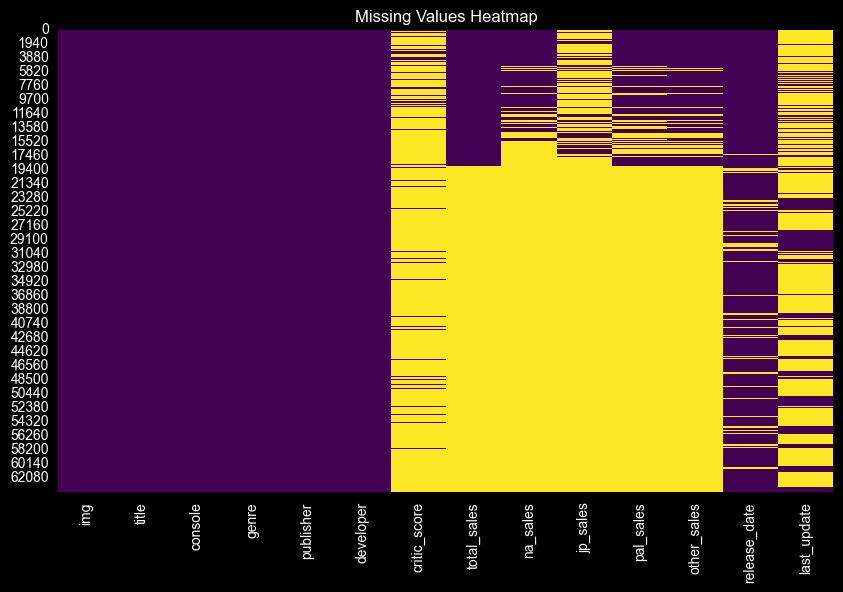

In [9]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## 5. Value Counts for Categorical Columns


In [11]:
# Check unique values in 'console'
print(f"Number of unique consoles: {df['console'].nunique()}")
print(df['console'].value_counts().head(10))


Number of unique consoles: 81
console
PC      12617
PS2      3565
DS       3288
PS4      2878
PS       2707
NS       2337
XBL      2120
PSN      2004
XOne     1963
PS3      1905
Name: count, dtype: int64


In [12]:
# Check unique values in 'genre'
print(f"Number of unique genres: {df['genre'].nunique()}")
print(df['genre'].value_counts())


Number of unique genres: 20
genre
Misc                9304
Action              8557
Adventure           6260
Role-Playing        5721
Sports              5586
Shooter             5410
Platform            4001
Strategy            3685
Puzzle              3521
Racing              3425
Simulation          3158
Fighting            2367
Action-Adventure    1877
Visual Novel         493
Music                297
Party                151
MMO                  115
Education             35
Board Game            33
Sandbox               20
Name: count, dtype: int64


In [13]:
# Check unique values in 'publisher'
print(f"Number of unique publishers: {df['publisher'].nunique()}")
print(df['publisher'].value_counts().head(10))


Number of unique publishers: 3383
publisher
Unknown                        8842
Sega                           2207
Ubisoft                        1663
Electronic Arts                1619
Activision                     1582
Konami                         1544
Nintendo                       1476
Sony Computer Entertainment    1372
Microsoft                      1272
THQ                            1111
Name: count, dtype: int64
